<a href="https://colab.research.google.com/github/AndreiAf02/STAT561_Project/blob/main/Another_copy_of_STAT561_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STAT 561 Project - Sampling Methodologies in Improving Transfer Learning Efficiency in Diabetes Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C53919):

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

In [ ]:
data = cdc_diabetes_health_indicators.data
# data (as pandas dataframes)
X = data.features
y = data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [ ]:
data2 = pd.concat([X, y], axis=1)
data2

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [ ]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


In [ ]:
X['Education'].value_counts()

,count
Education,
6,107325
5,69910
4,62750
3,9478
2,4043
1,174


In [ ]:
X['Income'].value_counts()

,count
Income,
8,90385
7,43219
6,36470
5,25883
4,20135
3,15994
2,11783
1,9811


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [ ]:
scaler = StandardScaler()

# Columns to normalize
normalize_cols = ['BMI', 'MentHlth', 'PhysHlth']
data2[normalize_cols] = scaler.fit_transform(data2[normalize_cols])


In [ ]:
# # Separate features and target
# X = data2.drop(columns=['Diabetes_binary'])
# y = data2['Diabetes_binary']

## Model

In [ ]:
def create_dnn_model(input_shape):
    model = Sequential([
        Dense(16, activation='relu', input_shape=input_shape),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['AUC'])

    return model

In [ ]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, domain):
    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # # Evaluate on the test data
    # test_loss, test_accuracy = model.evaluate(X_test, y_test)
    # print(f"{domain} Domain Test Accuracy: {test_accuracy}")

    # # Predictions and confusion matrix
    # predicted = model.predict(X_test)
    # predicted = tf.squeeze(predicted)
    # predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
    # actual = np.array(y_test)
    # conf_mat = confusion_matrix(actual, predicted)
    # displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    # displ.plot()

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")


# Splitting for Source and Target Domains:


## Full Dataset:

In [ ]:
data_S = data2[~data2['Education'].isin([1, 2])]  ## Source domain and classification
data_T = data2[data2['Education'].isin([1, 2])]  ## Target domain and classification

In [ ]:
data_T.shape

(4217, 22)

In [ ]:
X_S_full = data_S.iloc[:, :21] ## Source domain

y_S_full = data_S.iloc[:, 21]
y_S_full       ## Source classification (response)

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253674,0
253675,0
253677,0
253678,0


In [ ]:
# undersampler = RandomUnderSampler(random_state=123)
# X_S_full, y_S_full = undersampler.fit_resample(X_S_full1, y_S_full1)

In [ ]:
X_T_full = data_T.iloc[:, :21] ## Target domain

y_T_full = data_T.iloc[:, 21]
y_T_full      ## Target classification (response)

,Diabetes_binary
21,0
27,1
83,1
95,1
190,0
...,...
253645,0
253652,1
253669,0
253672,0


In [ ]:
sampler = SMOTETomek(random_state=123)
# sampler1 = RandomOverSampler(random_state=123)
# X_T_full, y_T_full = sampler1.fit_resample(X_T_full1, y_T_full1)

In [ ]:
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(X_T_full, y_T_full, test_size=0.2, random_state=123)

In [ ]:
model_target = create_dnn_model((X_T_train.shape[1],))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - AUC: 0.4930 - loss: 0.6860 - val_AUC: 0.6312 - val_loss: 0.5974
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6504 - loss: 0.5836 - val_AUC: 0.6799 - val_loss: 0.5789
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7046 - loss: 0.5537 - val_AUC: 0.7062 - val_loss: 0.5624
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7088 - loss: 0.5378 - val_AUC: 0.7230 - val_loss: 0.5527
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.7277 - loss: 0.5286 - val_AUC: 0.7342 - val_loss: 0.5484
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.7248 - loss: 0.5533 - val_AUC: 0.7351 - val_loss: 0.5448
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.7235 - loss: 0.5283 - val_AUC: 0.7351 - val_loss: 0.5484
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.7356 - loss: 0.5343 - val_AUC: 0.7438 - val_loss: 0.5395
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.7422 - loss:

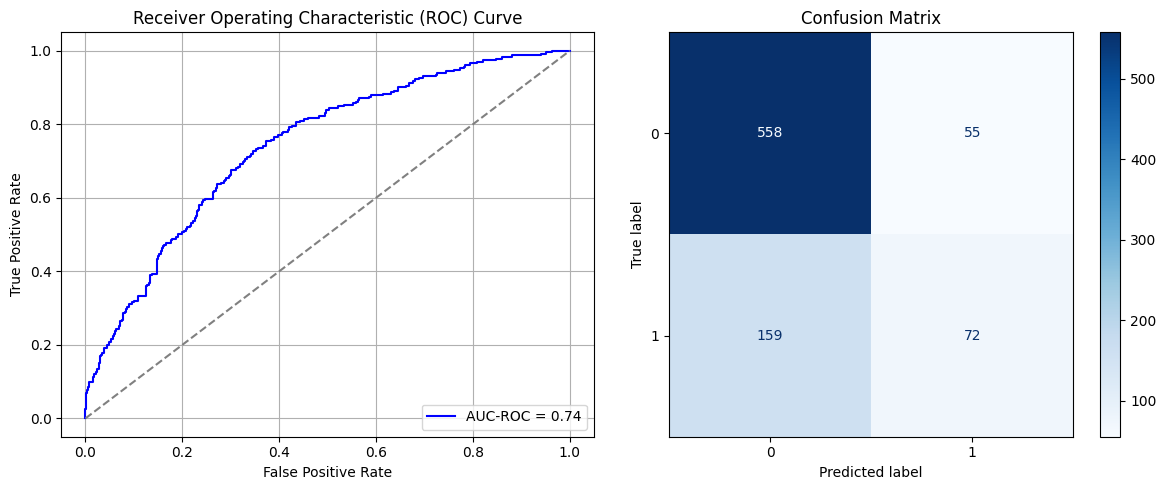

Best threshold based on F1-score: 0.32974156737327576


In [ ]:
train_and_evaluate(model_target, X_T_train, X_T_test, y_T_train, y_T_test, "Target as Source")

## SRS Sample for Training on Source Domain:

In [ ]:
np.random.seed(123)
data_S_SRS = data_S.sample(frac=0.1)
print(data_S_SRS)

        HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
95900        0         0          1 -0.663122       0       0   
19493        1         1          1  0.244774       0       0   
103891       0         0          1 -0.814438       1       0   
103958       1         0          1  0.396091       0       0   
11606        0         0          1 -1.117071       0       0   
...        ...       ...        ...       ...     ...     ...   
181630       1         0          1  2.514516       0       0   
243060       0         0          1 -0.814438       0       0   
139209       1         1          1 -1.419703       1       1   
4684         0         0          0 -0.663122       1       0   
103476       0         0          1 -0.965755       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
95900                      0             0       0        1  ...            0   
19493                      0             0       1       

In [ ]:
X_S_SRS1 = data_S_SRS.iloc[:, :21]  ## Source domain


y_S_SRS1 = data_S_SRS.iloc[:, 21]  ## Source classification (response)

X_S_SRS, y_S_SRS = sampler.fit_resample(X_S_SRS1, y_S_SRS1)

print(X_S_SRS.shape)
print(y_S_SRS.shape)

(42958, 21)
(42958,)


Use "X_S_SRS" as source domain and "y_S_SRS" as source classification for training the DNN, and use "X_T_full" and "y_T_full" for target domain and classification for TL.

In [ ]:
# Splitting the dataset into training and testing sets
X_S_SRS_train, X_S_SRS_test, y_S_SRS_train, y_S_SRS_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.2, random_state=123)

In [ ]:
model_SRS = create_dnn_model((X_S_SRS_train.shape[1],))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.6961 - loss: 0.6378 - val_AUC: 0.8100 - val_loss: 0.5302
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8093 - loss: 0.5303 - val_AUC: 0.8153 - val_loss: 0.5224
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8199 - loss: 0.5187 - val_AUC: 0.8155 - val_loss: 0.5316
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8168 - loss: 0.5222 - val_AUC: 0.8182 - val_loss: 0.5187
Epoch 5/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8234 - loss: 0.5137 - val_AUC: 0.8200 - val_loss: 0.5164
Epoch 6/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8220 - loss: 0.5140 - val_AUC: 0.8220 - val_loss: 0.5168
Epoch 7/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8231 - loss: 0.5125 - val_AUC: 0.8215 - val_loss: 0.5135
Epoch 8/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8279 - loss: 0.5071 - val_AUC: 0.8232 - val_loss: 0.5138
Epoch 9/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AU

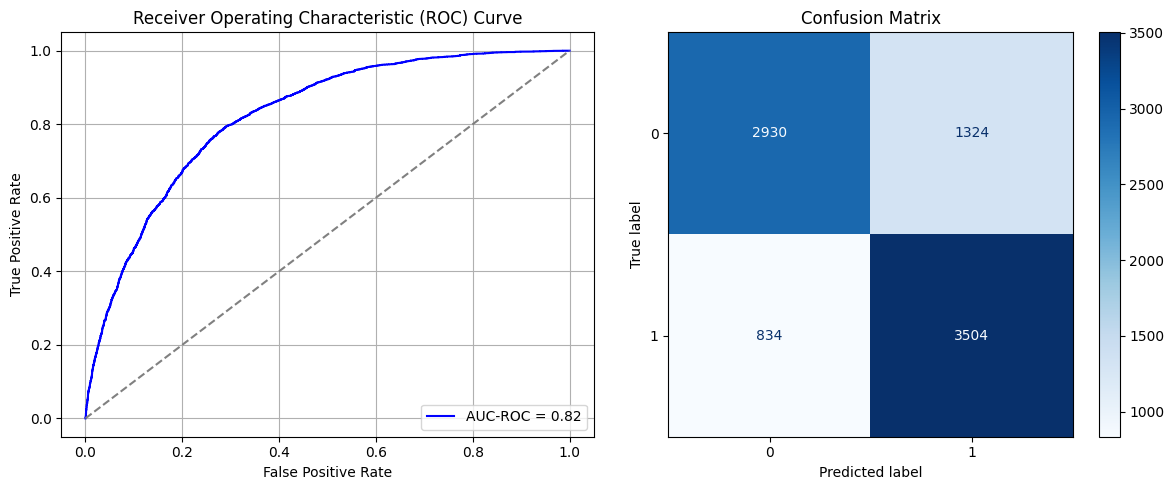

Best threshold based on F1-score: 0.4387551546096802


In [ ]:
train_and_evaluate(model_SRS, X_S_SRS_train, X_S_SRS_test, y_S_SRS_train, y_S_SRS_test, "Source")

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7457 - loss: 0.5304 - val_AUC: 0.7468 - val_loss: 0.5419
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7721 - loss: 0.5065 - val_AUC: 0.7447 - val_loss: 0.5365
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7558 - loss: 0.5189 - val_AUC: 0.7471 - val_loss: 0.5356
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7541 - loss: 0.5089 - val_AUC: 0.7488 - val_loss: 0.5355
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7716 - loss: 0.5088 - val_AUC: 0.7467 - val_loss: 0.5359
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7615 - loss: 0.5084 - val_AUC: 0.7500 - val_loss: 0.5333
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7585 - loss: 0.5105 - val_AUC: 0.7516 - val_loss: 0.5342
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7690 - loss: 0.5063 - val_AUC: 0.7479 - val_loss: 0.5345
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7812 - loss: 

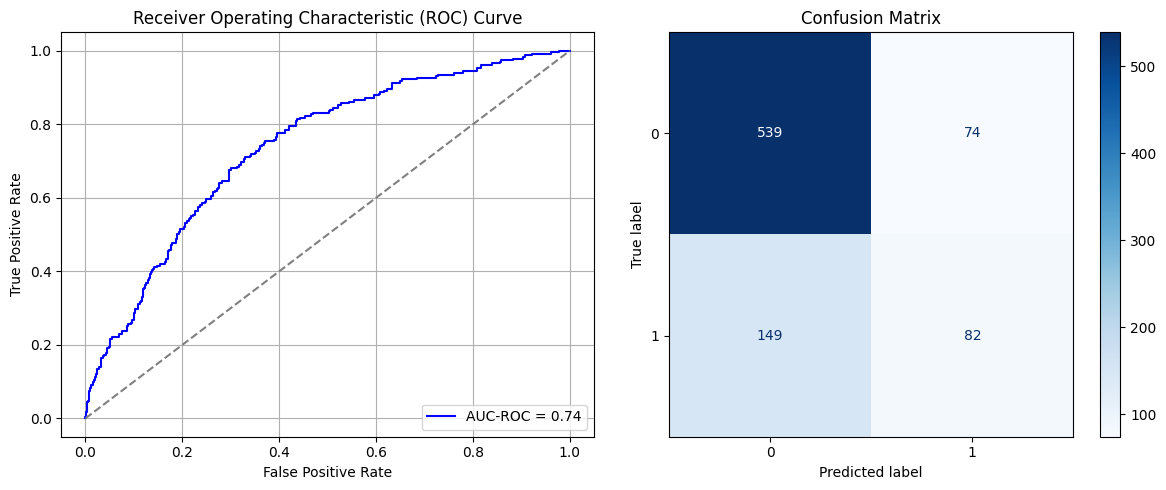

Best threshold based on F1-score: 0.3187884986400604


In [ ]:
train_and_evaluate(model_SRS, X_T_train, X_T_test, y_T_train, y_T_test, "Target")

## Systematic Sample for Training on Source Domain:

---



In [ ]:
systematic_index = np.arange(0, len(data_S), 5)  # considering every 5th element for systematic sampling
data_S_systematic = data_S.iloc[systematic_index]
X_S_systematic1 = data_S_systematic.iloc[:, :21]  ## Source domain

y_S_systematic1 = data_S_systematic.iloc[:, 21] ## Source classification (response)

X_S_systematic, y_S_systematic = sampler.fit_resample(X_S_systematic1, y_S_systematic1)

# Train-test splitting
X_S_train_systematic, X_S_test_systematic, y_S_train_systematic, y_S_test_systematic = train_test_split(X_S_systematic, y_S_systematic, test_size=0.8, random_state=123)

In [ ]:
X_S_train_systematic

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
41879,0,0,0,-0.511806,0,0,0,1,1,1,...,1,0,1,-0.429630,-0.371886,0,1,1,5,7
85426,0,0,1,0.322374,0,0,0,1,1,0,...,1,0,3,-0.429630,-0.486592,0,1,9,4,7
41831,1,0,1,1.606620,1,0,0,1,1,1,...,1,0,2,-0.024926,-0.142474,0,0,10,5,6
29339,1,1,1,0.396091,1,0,0,1,0,0,...,1,0,3,-0.429630,-0.486592,0,0,7,5,7
14436,1,0,1,1.152671,0,0,0,1,1,1,...,1,0,2,-0.429630,-0.486592,0,1,8,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,0,1,1,-0.160119,0,0,0,0,1,0,...,1,1,5,0.022509,1.615303,0,0,10,5,2
61404,1,0,1,0.703430,0,0,0,0,1,1,...,1,0,3,-0.421237,2.954590,1,0,12,3,3
17730,0,0,1,-0.663122,1,0,0,1,1,1,...,1,0,1,-0.429630,-0.486592,0,1,10,6,6
28030,0,0,1,-0.209174,1,0,0,1,1,1,...,1,0,3,-0.429630,-0.486592,0,1,10,5,7


In [ ]:
model_systematic = create_dnn_model((X_S_train_systematic.shape[1],))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.5943 - loss: 0.8179 - val_AUC: 0.7968 - val_loss: 0.5468
Epoch 2/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8029 - loss: 0.5395 - val_AUC: 0.8094 - val_loss: 0.5337
Epoch 3/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8068 - loss: 0.5323 - val_AUC: 0.8124 - val_loss: 0.5330
Epoch 4/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8141 - loss: 0.5233 - val_AUC: 0.8148 - val_loss: 0.5208
Epoch 5/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8222 - loss: 0.5133 - val_AUC: 0.8168 - val_loss: 0.5179
Epoch 6/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8195 - loss: 0.5161 - val_AUC: 0.8182 - val_loss: 0.5151
Epoch 7/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8173 - loss: 0.5178 - val_AUC: 0.8181 - val_loss: 0.5147
Epoch 8/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8239 - loss: 0.5116 - val_AUC: 0.8178 - val_loss: 0.5151
Epoch 9/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

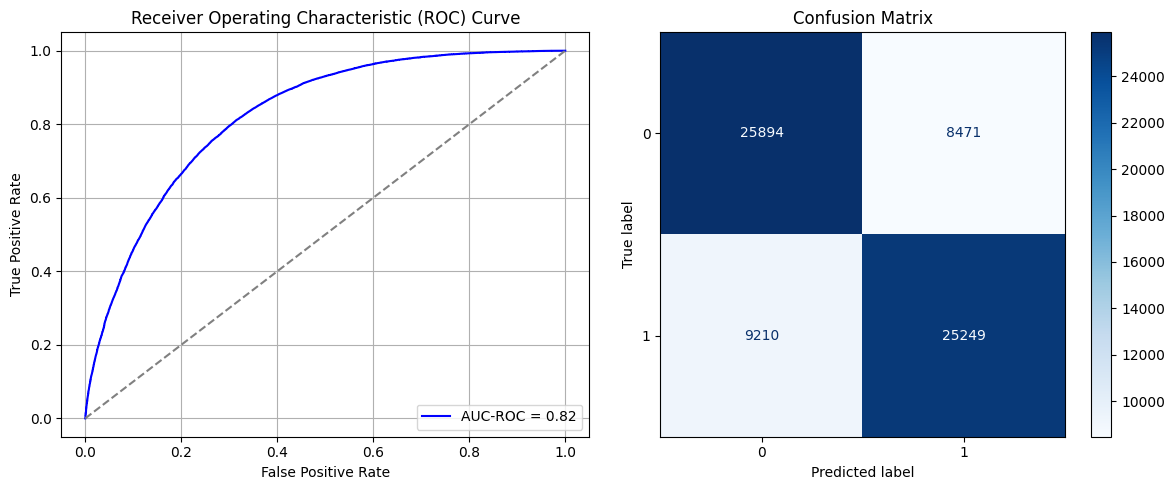

Best threshold based on F1-score: 0.3395100235939026


In [ ]:
train_and_evaluate(model_systematic, X_S_train_systematic, X_S_test_systematic, y_S_train_systematic, y_S_test_systematic, "Source")

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6861 - loss: 0.6662 - val_AUC: 0.7207 - val_loss: 0.5549
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7084 - loss: 0.5530 - val_AUC: 0.7350 - val_loss: 0.5434
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7243 - loss: 0.5397 - val_AUC: 0.7399 - val_loss: 0.5416
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7420 - loss: 0.5296 - val_AUC: 0.7477 - val_loss: 0.5341
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7476 - loss: 0.5256 - val_AUC: 0.7505 - val_loss: 0.5327
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7550 - loss: 0.5217 - val_AUC: 0.7537 - val_loss: 0.5304
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7446 - loss: 0.5377 - val_AUC: 0.7575 - val_loss: 0.5292
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7482 - loss: 0.5315 - val_AUC: 0.7586 - val_loss: 0.5280
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7564 - loss: 

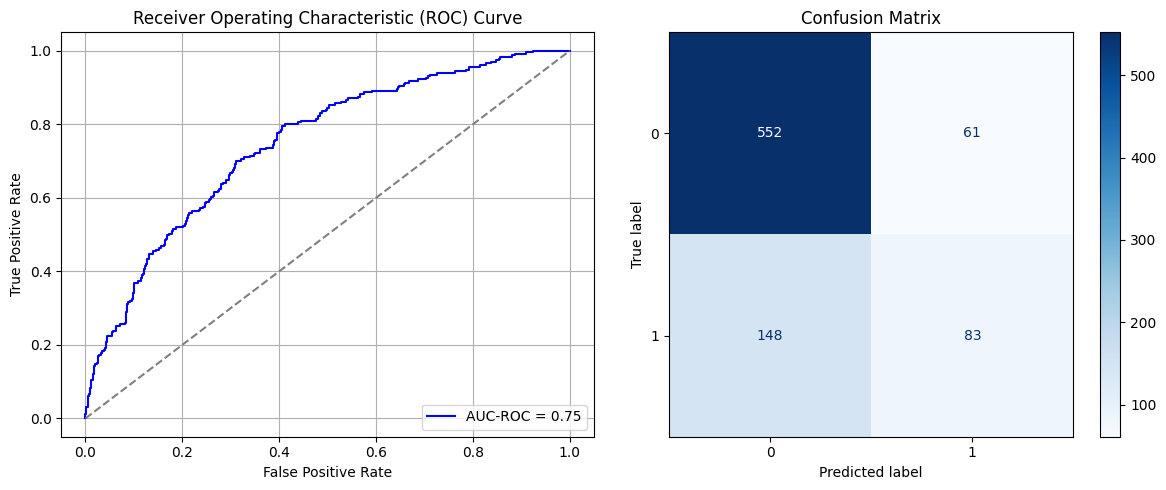

Best threshold based on F1-score: 0.3439568877220154


In [ ]:
train_and_evaluate(model_systematic, X_T_train, X_T_test, y_T_train, y_T_test, "Target")

## Stratified Sample for Training on Source Domain

In [ ]:
data_S

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,1.757936,1,0,0,0,0,1,...,0,5,1.998592,1.233999,1,0,9,4,3,0
1,0,0,0,-0.511806,1,0,0,1,0,0,...,1,3,-0.429630,-0.486592,0,0,7,6,1,0
2,1,1,1,-0.057858,0,0,0,0,1,0,...,1,5,3.617407,2.954590,1,0,9,4,8,0
3,1,0,1,-0.209174,0,0,0,1,1,1,...,0,2,-0.429630,-0.486592,0,0,11,3,6,0
4,1,1,1,-0.663122,0,0,0,1,1,1,...,0,2,-0.024926,-0.486592,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0,0,1,-0.209174,0,0,0,0,0,1,...,0,1,-0.429630,-0.486592,0,0,3,6,5,0
253675,1,1,1,2.514516,0,0,0,0,1,1,...,0,3,-0.429630,0.086938,0,1,5,6,7,0
253677,0,0,1,-0.057858,0,0,0,1,1,0,...,0,1,-0.429630,-0.486592,0,0,2,5,2,0
253678,1,0,1,-0.814438,0,0,0,0,1,1,...,0,3,-0.429630,-0.486592,0,1,7,5,1,0


In [ ]:
pop_count = data_S.groupby(['GenHlth','Income', 'Education', 'Age'])['GenHlth'].count()
print(pop_count)

GenHlth  Income  Education  Age
1        1       3          1       6
                            2       5
                            3      12
                            4       4
                            5       4
                                   ..
5        8       6          9      74
                            10     79
                            11     54
                            12     32
                            13     51
Name: GenHlth, Length: 2052, dtype: int64


In [ ]:
stratified_sample = list(map(lambda x : data_S[
    (
        data_S['GenHlth'] == pop_count.index[x][0]
    )
    &
    (
        data_S['Income'] == pop_count.index[x][1]
    )
    &
    (
        data_S['Education'] == pop_count.index[x][2]
    )
    &
    (
        data_S['Age'] == pop_count.index[x][3]
    )
].sample(frac=0.001), range(len(pop_count))))
stratified_sample = pd.concat(stratified_sample)

X_S_stratified_sample = stratified_sample.iloc[:, :21]
y_S_stratified_sample = stratified_sample.iloc[:, 21]

X_S_stratified, y_S_stratified = sampler.fit_resample(X_S_stratified_sample, y_S_stratified_sample)
X_S_train_stratified, X_S_test_stratified, y_S_train_stratified, y_S_test_stratified = train_test_split(X_S_stratified, y_S_stratified, test_size=0.8, random_state=123)

In [ ]:
model_systematic = create_dnn_model((X_S_train_stratified.shape[1],))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - AUC: 0.3322 - loss: 0.8652 - val_AUC: 0.3214 - val_loss: 0.6309
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - AUC: 0.3609 - loss: 0.8232 - val_AUC: 0.3214 - val_loss: 0.6328
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - AUC: 0.3529 - loss: 0.7944 - val_AUC: 0.3571 - val_loss: 0.6374
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - AUC: 0.3573 - loss: 0.7983 - val_AUC: 0.4286 - val_loss: 0.6422
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - AUC: 0.3843 - loss: 0.7844 - val_AUC: 0.4286 - val_loss: 0.6438
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - AUC: 0.3839 - loss: 0.7507 - val_AUC: 0.4286 - val_loss: 0.6445
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - AUC: 0.4246 - loss: 0.7432 - val_AUC: 0.4286 - val_loss: 0.6459
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - AUC: 0.4381 - loss: 0.7260 - val_AUC: 0.4286 - val_loss: 0.6472
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - AUC: 0.4672 - loss: 0.7209 -

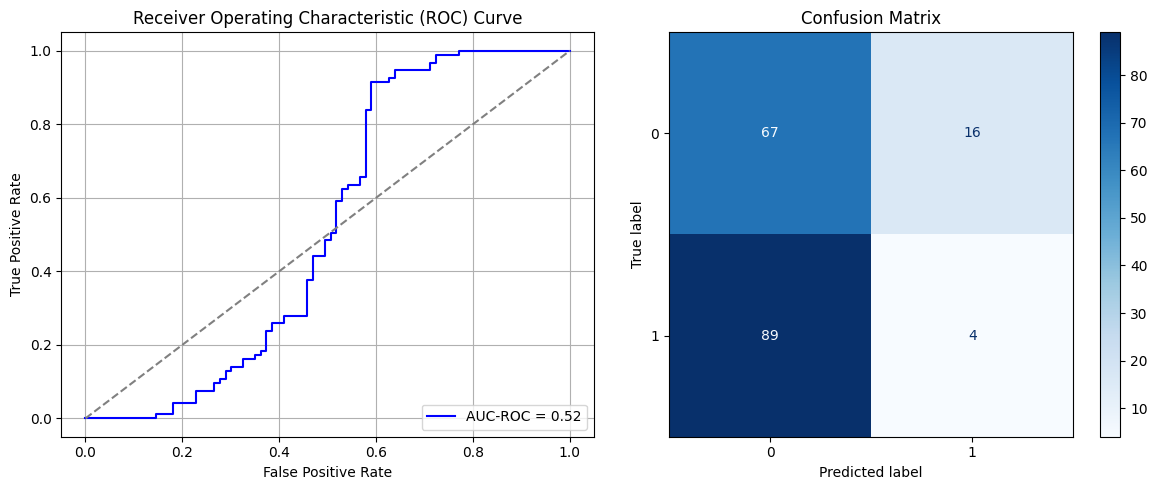

Best threshold based on F1-score: 0.5501708984375


<ipython-input-18-c4f5b4c168e8>:60: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [ ]:
train_and_evaluate(model_systematic, X_S_train_stratified, X_S_test_stratified,y_S_train_stratified, y_S_test_stratified, "Source")

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5922 - loss: 0.6836 - val_AUC: 0.5997 - val_loss: 0.6059
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6267 - loss: 0.5902 - val_AUC: 0.6353 - val_loss: 0.5908
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6606 - loss: 0.5829 - val_AUC: 0.6595 - val_loss: 0.5830
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6828 - loss: 0.5639 - val_AUC: 0.6828 - val_loss: 0.5729
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6995 - loss: 0.5523 - val_AUC: 0.7009 - val_loss: 0.5657
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7066 - loss: 0.5650 - val_AUC: 0.7041 - val_loss: 0.5644
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7005 - loss: 0.5476 - val_AUC: 0.7153 - val_loss: 0.5576
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7279 - loss: 0.5459 - val_AUC: 0.7218 - val_loss: 0.5560
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7223 - loss: 

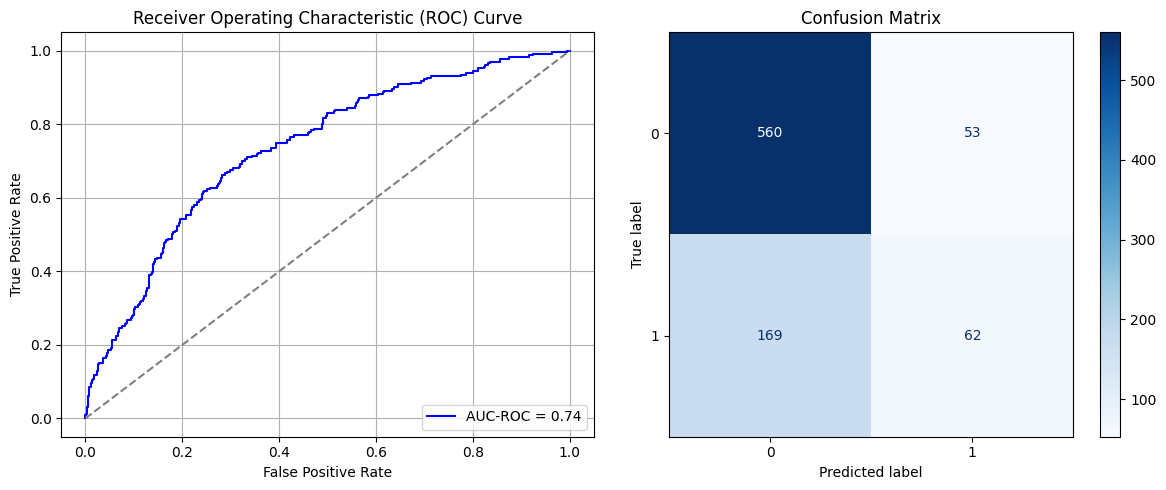

Best threshold based on F1-score: 0.34714752435684204


In [ ]:
train_and_evaluate(model_systematic, X_T_train, X_T_test, y_T_train, y_T_test, "Target")